In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize

In [18]:
airline=pd.read_csv("EastWestAirlines.csv")


In [19]:
airline

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  
0          0  
1          0  
2          0  
3          0  
4          1  
...      ...  
3994       1  
3995       1  
3996       1  
3997       0  
3998       0  

[3999 rows x 12 columns]

In [20]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [21]:
df_norm = norm_func(airline.iloc[:,1:])
df_norm

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0     0.016508         0.0       0.00        0.0        0.0     0.000660   
1     0.011288         0.0       0.00        0.0        0.0     0.000815   
2     0.024257         0.0       0.00        0.0        0.0     0.015636   
3     0.008667         0.0       0.00        0.0        0.0     0.001896   
4     0.057338         0.0       0.75        0.0        0.0     0.164211   
...        ...         ...        ...        ...        ...          ...   
3994  0.010837         0.0       0.00        0.0        0.0     0.032330   
3995  0.037766         0.0       0.00        0.0        0.0     0.003720   
3996  0.043169         0.0       0.50        0.0        0.0     0.096505   
3997  0.032202         0.0       0.00        0.0        0.0     0.001896   
3998  0.001769         0.0       0.00        0.0        0.0     0.000000   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0        0.011628           0.000000         0.000000           0.843742   
1        0.023256           0.000000         0.000000           0.839884   
2        0.046512           0.000000         0.000000           0.847842   
3        0.011628           0.000000         0.000000           0.837955   
4        0.302326           0.067398         0.075472           0.835905   
...           ...                ...              ...                ...   
3994     0.046512           0.006490         0.018868           0.168917   
3995     0.058140           0.000000         0.000000           0.167953   
3996     0.093023           0.000000         0.000000           0.168797   
3997     0.011628           0.016225         0.018868           0.168676   
3998     0.000000           0.000000         0.000000           0.168314   

      Award?  
0        0.0  
1        0.0  
2        0.0  
3        0.0  
4        1.0  
...      ...  
3994     1.0  
3995     1.0  
3996     1.0  
3997     0.0  
3998     0.0  

[3999 rows x 11 columns]

In [22]:
df_norm = norm_func(airline.iloc[:,1:])

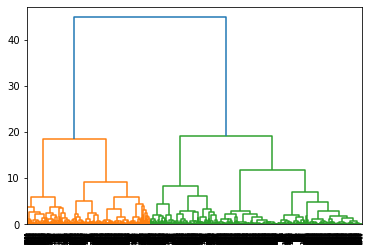

In [23]:
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='ward'))

In [24]:
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'complete')

In [25]:
y_hc = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [26]:
Clusters

Clusters
0            0
1            0
2            0
3            0
4            1
...        ...
3994         2
3995         2
3996         2
3997         0
3998         0

[3999 rows x 1 columns]

In [27]:
airline['h_clusterid']=hc.labels_

In [28]:
airline

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  h_clusterid  
0          0            0  
1          0            0  
2          0            0  
3          0            0  
4          1            1  
...      ...          ...  
3994       1            2  
3995       1            2  
3996       1            2  
3997       0            0  
3998       0            0  

[3999 rows x 13 columns]

In [29]:
from sklearn.cluster import KMeans

In [30]:
model = KMeans(n_clusters=5)
model.fit(df_norm)

model.labels_

array([4, 4, 4, ..., 1, 2, 2], dtype=int32)

In [31]:
md=pd.Series(model.labels_)
airline['clust']=md
df_norm.head()

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0  0.016508         0.0       0.00        0.0        0.0     0.000660   
1  0.011288         0.0       0.00        0.0        0.0     0.000815   
2  0.024257         0.0       0.00        0.0        0.0     0.015636   
3  0.008667         0.0       0.00        0.0        0.0     0.001896   
4  0.057338         0.0       0.75        0.0        0.0     0.164211   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  
0     0.011628           0.000000         0.000000           0.843742     0.0  
1     0.023256           0.000000         0.000000           0.839884     0.0  
2     0.046512           0.000000         0.000000           0.847842     0.0  
3     0.011628           0.000000         0.000000           0.837955     0.0  
4     0.302326           0.067398         0.075472           0.835905     1.0

In [32]:
airline.iloc[:,1:12].groupby(airline.clust).mean()

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
clust                                                               
0      118297.325243   73.467638   3.584142   1.001618   1.022654   
1      108317.387376  198.336634   3.915842   1.001238   1.025990   
2       33097.301357   94.131783   1.070736   1.016473   1.006783   
3       83529.153046  290.453195   1.156018   1.032689   1.008915   
4       49921.633641   89.903226   1.122120   1.019585   1.001152   

        Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
clust                                                                  
0      31384.393204    17.233010         224.100324         0.627832   
1      45609.657178    20.201733         713.728960         2.142327   
2       3244.520349     6.173450         212.850775         0.603682   
3       8850.395245    10.476969        1030.112927         3.148588   
4       3467.074885     6.913594         243.834101         0.728111   

       Days_since_enroll  Award?  
clust                             
0            4419.553398     0.0  
1            4863.439356     1.0  
2            1992.402132     0.0  
3            4338.867756     1.0  
4            5567.925115     0.0

In [33]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [34]:
Airline=pd.read_csv("EastWestAirlines.csv")

In [35]:
Airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [36]:
df=Airline.iloc[:,1:12]

In [37]:
df

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0       28143           0          1          1          1          174   
1       19244           0          1          1          1          215   
2       41354           0          1          1          1         4123   
3       14776           0          1          1          1          500   
4       97752           0          4          1          1        43300   
...       ...         ...        ...        ...        ...          ...   
3994    18476           0          1          1          1         8525   
3995    64385           0          1          1          1          981   
3996    73597           0          3          1          1        25447   
3997    54899           0          1          1          1          500   
3998     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  
0          0  
1          0  
2          0  
3          0  
4          1  
...      ...  
3994       1  
3995       1  
3996       1  
3997       0  
3998       0  

[3999 rows x 11 columns]

In [38]:
array=df.values

In [39]:
stscaler=StandardScaler().fit(array)
X=stscaler.transform(array)

In [40]:
X

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [41]:
dbscan = DBSCAN(eps=2, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=2)

In [42]:
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0])

In [43]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [44]:
cl

cluster
0           0
1           0
2           0
3           0
4           1
...       ...
3994        1
3995        1
3996        1
3997        0
3998        0

[3999 rows x 1 columns]

In [45]:
pd.concat([df,cl],axis=1)

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0       28143           0          1          1          1          174   
1       19244           0          1          1          1          215   
2       41354           0          1          1          1         4123   
3       14776           0          1          1          1          500   
4       97752           0          4          1          1        43300   
...       ...         ...        ...        ...        ...          ...   
3994    18476           0          1          1          1         8525   
3995    64385           0          1          1          1          981   
3996    73597           0          3          1          1        25447   
3997    54899           0          1          1          1          500   
3998     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  cluster  
0          0        0  
1          0        0  
2          0        0  
3          0        0  
4          1        1  
...      ...      ...  
3994       1        1  
3995       1        1  
3996       1        1  
3997       0        0  
3998       0        0  

[3999 rows x 12 columns]